[Homework #2](https://colab.research.google.com/github/Jaguar838/ml-zoomcamp/blob/master/HW/02-regression/hw-02/hw-02.ipynb)

In [ ]:
!python -V

Python 3.10.12


In [1]:
import numpy as np
import pandas as pd

### Dataset

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv")

### Prepare Dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Laptop        2160 non-null   object 
 1   Status        2160 non-null   object 
 2   Brand         2160 non-null   object 
 3   Model         2160 non-null   object 
 4   CPU           2160 non-null   object 
 5   RAM           2160 non-null   int64  
 6   Storage       2160 non-null   int64  
 7   Storage type  2118 non-null   object 
 8   GPU           789 non-null    object 
 9   Screen        2156 non-null   float64
 10  Touch         2160 non-null   object 
 11  Final Price   2160 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 202.6+ KB


In [3]:
# Спочатку нормалізуємо назви стовпців:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.columns

Index(['laptop', 'status', 'brand', 'model', 'cpu', 'ram', 'storage',
       'storage_type', 'gpu', 'screen', 'touch', 'final_price'],
      dtype='object')

Далі використовуйте лише наступні стовпці:

* `'ram'`,
* `'storage'`,
* `'screen'`,
* `'final_price'`

In [4]:
columns = [
    "ram",
    "storage",
    "screen",
    "final_price"
]

df = df[columns]

In [ ]:

#@ INITIALIZING DESCRIPTIVE ANALYSIS:
df.describe(percentiles=[.0, .25, .5, .75, .9, .95, .99, .1]).T

,count,mean,std,min,0%,10%,25%,50%,75%,90%,95%,99%,max
ram,2160.0,15.413889,9.867815,4.00,4.00,8.00,8.0000,16.000,16.00,32.000,32.0000,64.0000,128.00
storage,2160.0,596.294444,361.220506,0.00,0.00,256.00,256.0000,512.000,1000.00,1000.000,1000.0000,2000.0000,4000.00
screen,2156.0,15.168112,1.203329,10.10,10.10,13.40,14.0000,15.600,15.60,16.100,17.3000,17.3000,18.00
final_price,2160.0,1312.638509,911.475417,201.05,201.05,449.99,661.0825,1031.945,1708.97,2518.038,3199.0005,4499.4059,7150.47


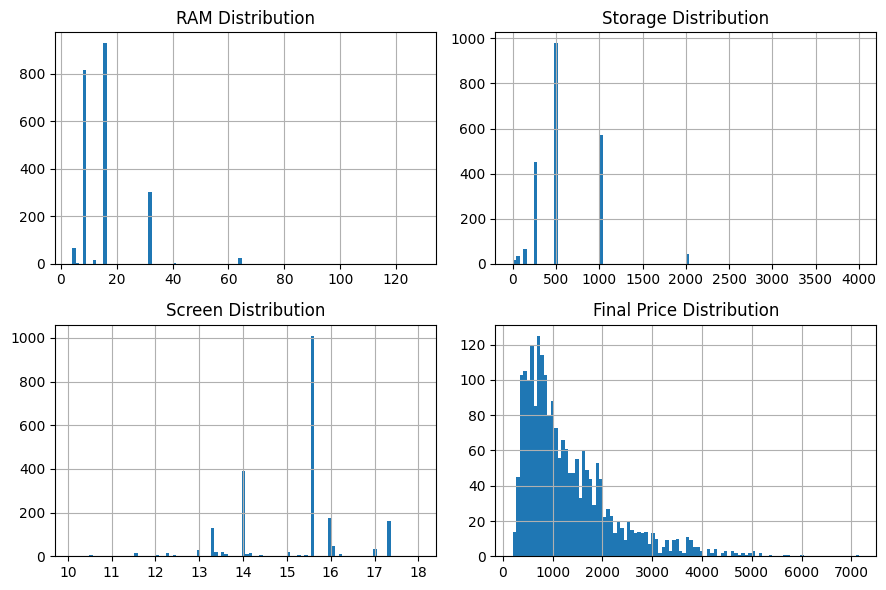

In [24]:
#@ INSPECTING HISTOGRAM:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 2, figsize=(9, 6))  # Create a figure and subplots

# Plot histograms for each column
df.hist(bins=100, column=["ram", "storage", "screen", "final_price"], ax=axes.ravel())

# Customize the plot (optional)
axes.ravel()[0].set_title('RAM Distribution')
axes.ravel()[1].set_title('Storage Distribution')
axes.ravel()[2].set_title('Screen Distribution')
axes.ravel()[3].set_title('Final Price Distribution')

plt.tight_layout()
plt.show()

<Axes: xlabel='final_price', ylabel='Count'>

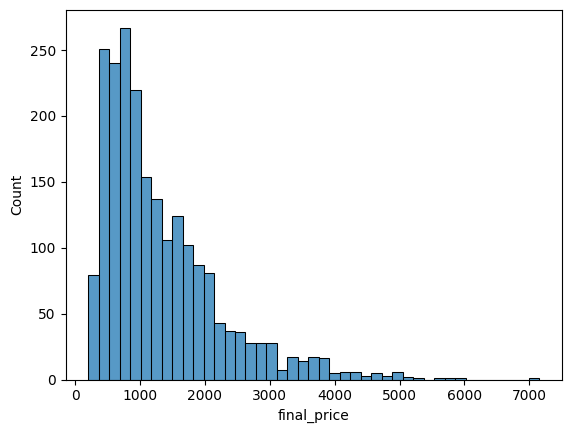

In [ ]:
#@ INSPECTING FINAL PRICE:
import seaborn as sns
sns.histplot(df.final_price)

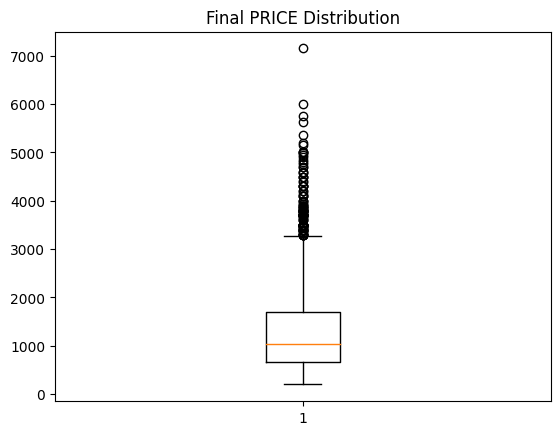

In [ ]:
plt.boxplot(df['final_price'])
plt.title('Final PRICE Distribution')
plt.show()

**Question 1**: Feature with missing values

In [ ]:
missing_values = df.isnull().sum()
missing_values

,0
ram,0
storage,0
screen,4
final_price,0


In [ ]:
# Знаходження назв стовпців з пропущеними значеннями
columns_with_missing = missing_values[missing_values > 0].index.tolist()[0]
print('Q1:',columns_with_missing)

Q1: screen


**Question 2**: What's the median (50% percentile) for variable 'ram'?

In [ ]:
median_ram = df['ram'].quantile(0.5)
print('Q2:',median_ram )

Q2: 16.0


Splitting and preparing the dataset

In [5]:
n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [6]:
#@ PREPARING THE LABELS:
y_train = df_train.final_price.values
y_val = df_val.final_price.values
y_test = df_test.final_price.values

del df_train['final_price']
del df_val['final_price']
del df_test['final_price']

**Question 3**: Mean vs zero

In [7]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]

def prepare_X(df, fillna_value):
    df = df.fillna(fillna_value)
    X = df.values
    return X

def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

with mean:

In [8]:
mean = df_train.screen.mean()

X_train = prepare_X(df_train, fillna_value=mean)
w_0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val, fillna_value=mean)
y_pred = w_0 + X_val.dot(w)

round(rmse(y_val, y_pred), 2)

600.27

with 0:

In [9]:
X_train = prepare_X(df_train, fillna_value=0)
w_0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val, fillna_value=0)
y_pred = w_0 + X_val.dot(w)

round(rmse(y_val, y_pred), 2)

597.36

The answer: **With 0**

**Question 4**: Regularization

In [10]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]

In [11]:
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w_0 + X_val.dot(w)
    rmse_val = rmse(y_val, y_pred)
    print('%06s %0.5f' % (r, rmse_val))

     0 597.36356
 1e-06 597.36356
0.0001 597.36354
 0.001 597.36337
  0.01 597.36168
   0.1 597.34516
     1 597.21212
     5 597.01112
    10 597.05877


The answer: `r=0`

**Question 5**: Standard deviation of RMSE

In [16]:
rmses = []

for s in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:

    n = len(df)

    n_val = int(0.2 * n)
    n_test = int(0.2 * n)
    n_train = n - (n_val + n_test)

    idx = np.arange(n)
    np.random.seed(s)
    np.random.shuffle(idx)

    df_shuffled = df.iloc[idx]

    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()

    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)

    y_train = df_train.final_price.values
    y_val = df_val.final_price.values
    y_test = df_test.final_price.values

    del df_train['final_price']
    del df_val['final_price']
    del df_test['final_price']

    X_train = prepare_X(df_train, fillna_value=0)
    w_0, w = train_linear_regression(X_train, y_train)

    X_val = prepare_X(df_val, fillna_value=0)
    y_pred = w_0 + X_val.dot(w)

    result = rmse(y_val, y_pred)
    print(s, result)

    rmses.append(result)

0 565.4520868771027
1 636.7985423056726
2 588.9558697907962
3 597.8148920012521
4 571.962791511102
5 573.2383256618949
6 647.3438328407208
7 550.4398184485952
8 587.333503616991
9 576.1017929433108


In [17]:
round(np.std(rmses), 3)

29.176

**Question 6**: RMSE for Test

In [18]:
n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.seed(9)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.final_price.values
y_val = df_val.final_price.values
y_test = df_test.final_price.values

del df_train['final_price']
del df_val['final_price']
del df_test['final_price']

In [19]:
df_full_train = pd.concat([df_train, df_val])
df_full_train = df_full_train.reset_index(drop=True)

X_full_train = prepare_X(df_full_train, fillna_value=0)
y_full_train = np.concatenate([y_train, y_val])
w_0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

X_test = prepare_X(df_test, fillna_value=0)
y_pred = w_0 + X_test.dot(w)

result = rmse(y_test, y_pred)
print(round(result, 2))

608.61
